# Data Cleaning

Cleaning des données dans le but de créer un modele de prédiction de prix 

- Traiter les données manquantes
- Regrouper/supprimer les données inutiles
- Supprimer les doublons
- Convertir string en int/float/bool

In [1]:
# importation des libs/datasets...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./dataset/immoCollect18.csv', index_col=0)
df.head()

,Lien,Prix,Type de propriété,Vente publique,Immeuble de rapport,Bien neuf,Code Postal,Ville,Sous-type de propriété,Nombre de façades,...,Type de cuisine,Feu ouvert,Meublé,Jardin,Surface du jardin,Terrasse,Surface de la terrasse,Surface totale du terrain,Piscine,Surface de la zone constructible
0,https://www.immoweb.be/fr/annonce/appartement/...,280000,Appartement,False,False,True,1180,Uccle,Appartement,2.0,...,Hyper équipée,False,False,True,25.0,True,12.0,None,False,None
1,https://www.immoweb.be/fr/annonce/appartement/...,282500,Appartement,False,False,True,1180,Uccle,Appartement,None,...,Américaine hyper-équipée,False,False,False,None,True,5.0,None,False,None
2,https://www.immoweb.be/fr/annonce/appartement/...,412500,Appartement,False,False,True,1180,Uccle,Appartement,None,...,Américaine hyper-équipée,False,False,False,None,True,15.0,None,False,None
3,https://www.immoweb.be/fr/annonce/appartement/...,380000,Appartement,False,False,True,1160,Auderghem,Appartement,2.0,...,Hyper équipée,False,False,False,None,True,13.0,None,False,87.0
4,https://www.immoweb.be/fr/annonce/appartement/...,165000,Appartement,False,False,True,6000,Charleroi,Appartement,4.0,...,Hyper équipée,False,False,False,None,False,None,None,False,None


In [2]:
df.shape

(18201, 23)

In [3]:
df.dtypes

Lien                                object
Prix                                object
Type de propriété                   object
Vente publique                        bool
Immeuble de rapport                   bool
Bien neuf                             bool
Code Postal                          int64
Ville                               object
Sous-type de propriété              object
Nombre de façades                   object
Etat du bâtiment                    object
Surface habitable                   object
Nombre de chambre(s)                object
Type de cuisine                     object
Feu ouvert                            bool
Meublé                                bool
Jardin                                bool
Surface du jardin                   object
Terrasse                              bool
Surface de la terrasse              object
Surface totale du terrain           object
Piscine                               bool
Surface de la zone constructible    object
dtype: obje

In [4]:
df.describe(include='object')

,Lien,Prix,Type de propriété,Ville,Sous-type de propriété,Nombre de façades,Etat du bâtiment,Surface habitable,Nombre de chambre(s),Type de cuisine,Surface du jardin,Surface de la terrasse,Surface totale du terrain,Surface de la zone constructible
count,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201,18201
unique,18201,2160,2,2242,25,10,7,1099,52,9,803,194,3062,411
top,https://www.immoweb.be/fr/annonce/duplex/a-ven...,295000,Maison,Uccle,Maison,None,Excellent état,None,3,Équipée,None,None,None,None
freq,1,221,9640,530,6679,5514,5898,2316,3956,6205,14880,11195,9512,16343


In [5]:
df.describe(include='bool')

,Vente publique,Immeuble de rapport,Bien neuf,Feu ouvert,Meublé,Jardin,Terrasse,Piscine
count,18201,18201,18201,18201,18201,18201,18201,18201
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,True,False
freq,17374,17350,16127,17227,17646,12579,11267,17621


In [6]:
# Affichage des valeurs manquantes
df.isna().sum()
# Pour le coup, pas case vide ! Nice ...

Lien                                0
Prix                                0
Type de propriété                   0
Vente publique                      0
Immeuble de rapport                 0
Bien neuf                           0
Code Postal                         0
Ville                               0
Sous-type de propriété              0
Nombre de façades                   0
Etat du bâtiment                    0
Surface habitable                   0
Nombre de chambre(s)                0
Type de cuisine                     0
Feu ouvert                          0
Meublé                              0
Jardin                              0
Surface du jardin                   0
Terrasse                            0
Surface de la terrasse              0
Surface totale du terrain           0
Piscine                             0
Surface de la zone constructible    0
dtype: int64

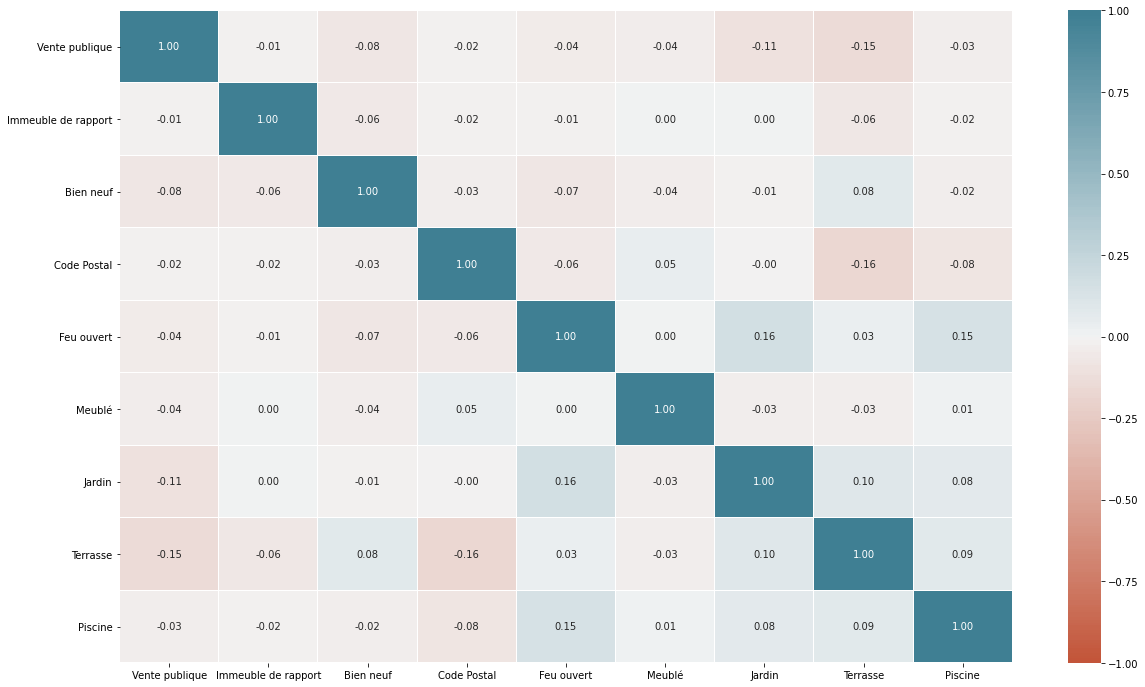

In [7]:
# Print the heatmap
plt.subplots(figsize=(20, 12))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

De base on ne peut pas voir de correlation et beaucoup de données sont en 'string' il va maintenant falloir remettre tout cela en ordre 

Zzzzzz'est partit !

In [8]:
# On commence par la suppression des doublons s'il y en a
df.drop_duplicates(inplace=True)

In [9]:
# Suppression préliminaires des collonnes inutiles
df.drop(columns=['Lien'],inplace=True)
# df.drop(columns=['Type de cuisine'],inplace=True)
df.drop(columns=['Sous-type de propriété'],inplace=True)
df.drop(columns=['Surface de la terrasse'],inplace=True)

In [10]:
def drop_string_and_float_transform(element):
    """
    Essaye de transformer un element en float
    Si pas, cela return un np.nan (non attribuate number)
    """
    try:
        transformed = float(element)
    except:
        transformed = np.nan
    finally:
        return transformed

## Nettoyage des collonnes
### Prix

In [11]:
# suppresion des strings et transformations des données en integer
print(df.shape)
df['Prix'] = df['Prix'].apply(drop_string_and_float_transform)
print(df['Prix'].isna().value_counts())
df.dropna(subset=['Prix'],inplace=True)
print(df.shape)

(18201, 20)
False    18178
True        23
Name: Prix, dtype: int64
(18178, 20)


In [12]:
df['Prix'] = df['Prix'].astype(int)

(18178, 20)

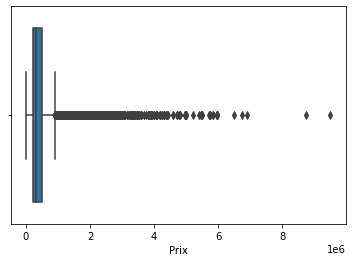

In [13]:
# affichage des outliers
sns.boxplot(x=df['Prix'])
df.shape

(14817, 20)

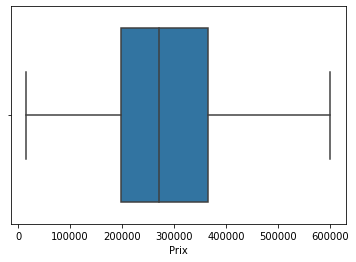

In [14]:
df = df[(df['Prix'] < 600000) & (df['Prix'] > 10000)]
sns.boxplot(x=df['Prix'])
df.shape

### Ville / Code Postal

In [15]:
df['Ville'].value_counts()

Gand                    381
Ostende                 258
Uccle                   235
Blankenberge            189
Bruxelles               176
                       ... 
Sart-lez-Spa              1
Beringen Koersel          1
Courcelles (Souvret)      1
Prouvy                    1
Sint-Maria-Oudenhove      1
Name: Ville, Length: 2103, dtype: int64

In [16]:
# df = df.groupby('Ville').filter(lambda x : len(x)>1)

On pourrais supprimer les villes entrées une seules fois mais on va plutôt droper la collonne et utiliser les code postaux

In [17]:
df.drop(columns=['Ville'],inplace=True)
df['Code Postal'].value_counts()

9000    370
8300    310
8400    275
1000    239
1180    236
       ... 
1461      1
9681      1
3580      1
1541      1
6687      1
Name: Code Postal, Length: 893, dtype: int64

In [18]:
# Suppression des code postaux utilisés une seule fois
df = df.groupby('Code Postal').filter(lambda x : len(x)>1)

In [19]:
df['Code Postal'].value_counts()

9000    370
8300    310
8400    275
1000    239
1180    236
       ... 
1980      2
6142      2
7801      2
3391      2
7880      2
Name: Code Postal, Length: 769, dtype: int64

### Nombre de chambre(s)

In [20]:
df['Nombre de chambre(s)'].value_counts()

3        3309
2        2761
2.0      2291
3.0      1494
4        1460
1.0       952
1         750
5         449
4.0       426
None      297
6         183
5.0       134
6.0        56
7          50
8          23
7.0        14
11          8
10          7
8.0         7
9           4
49.0        2
15.0        2
10.0        2
9.0         2
24          2
20          1
17          1
13          1
165.0       1
18.0        1
12          1
15          1
18          1
Name: Nombre de chambre(s), dtype: int64

In [21]:
# Suppression des lignes ou le nombres de chambre n'est pas indiqué
print(df.shape)
df = df[(df['Nombre de chambre(s)'] != 'None')]
print(df.shape)

(14693, 19)
(14396, 19)


In [22]:
df['Nombre de chambre(s)'] = df['Nombre de chambre(s)'].apply(drop_string_and_float_transform)
df['Nombre de chambre(s)'] = df['Nombre de chambre(s)'].astype(int)

df['Nombre de chambre(s)'].value_counts()

2      5052
3      4803
4      1886
1      1702
5       583
6       239
7        64
8        30
10        9
11        8
9         6
15        3
18        2
49        2
24        2
12        1
20        1
13        1
17        1
165       1
Name: Nombre de chambre(s), dtype: int64

<AxesSubplot:xlabel='Nombre de chambre(s)'>

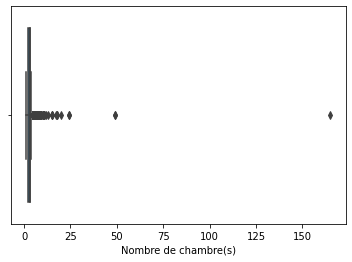

In [23]:
# affichage des outliers
sns.boxplot(x=df['Nombre de chambre(s)'])

A partir de la je n'ai plus qu'a identifier les outliers et filtrer mes lignes en conséquences

<AxesSubplot:xlabel='Nombre de chambre(s)'>

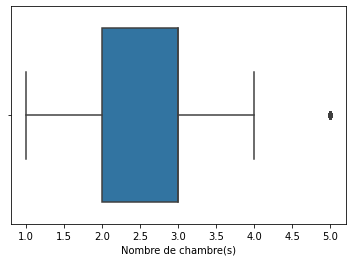

In [24]:
df = df[(df['Nombre de chambre(s)'] < 6) & (df['Nombre de chambre(s)'] > 0)]
sns.boxplot(x=df['Nombre de chambre(s)'])

In [25]:
print(df['Nombre de chambre(s)'].value_counts())
df.shape

2    5052
3    4803
4    1886
1    1702
5     583
Name: Nombre de chambre(s), dtype: int64


(14026, 19)

### Type de propriété

In [26]:
df['Type de propriété'].value_counts()

Appartement    7041
Maison         6985
Name: Type de propriété, dtype: int64

In [27]:
def property_to_bool(element):
    if element == "Maison":
        return 1
    else: 
        return 0
    
df['Type de propriété'] = df['Type de propriété'].apply(property_to_bool)

In [28]:
# 0 = Appartement
# 1 = Maison
df['Type de propriété'].value_counts()

0    7041
1    6985
Name: Type de propriété, dtype: int64

### Nombre de façades

In [29]:
print(df.shape)
df['Nombre de façades'].value_counts()

(14026, 19)


None    4517
2.0     4363
3.0     1917
4.0     1841
2        477
4        421
3        375
1.0      113
1          2
Name: Nombre de façades, dtype: int64

In [30]:
# Il faudrait supprimer trop d'entrée pour pouvoir l'utiliser dans un model de prédiction
# De plus la collonne n'est pas très pertinente, je vais donc la supprimer

df.drop(columns=['Nombre de façades'],inplace=True)

### Vente publique

In [31]:
df['Vente publique'].value_counts()

False    13288
True       738
Name: Vente publique, dtype: int64

In [32]:
# Suppression des ventes publiques (enchères) pour ne pas fausser les statistiques
df = df[df['Vente publique'] == False]
# Et suppression de la collonne ...
df.drop(columns=['Vente publique'],inplace=True)

### Etat du bâtiment

In [33]:
print(df.shape)
df['Etat du bâtiment'].value_counts()

(13288, 17)


Excellent état        4156
None                  3395
Bon                   3366
À rafraîchir           839
À rénover              807
Fraîchement rénové     678
À restaurer             47
Name: Etat du bâtiment, dtype: int64

In [34]:
# Suppression des lignes ou le batiment est "A restaurer" (trop mauvais état)
df = df[df['Etat du bâtiment'] != "À restaurer"]
print(df.shape)

# Et encore une fois trop de données manquantes dans cette collonne pour la suite du projet
df.drop(columns=['Etat du bâtiment'],inplace=True)

(13241, 17)


### Bien neuf

In [35]:
# La collonne semble ok
df['Bien neuf'].value_counts()

False    11460
True      1781
Name: Bien neuf, dtype: int64

### Surface habitable

In [36]:
df['Surface habitable'].value_counts()

None     1326
150.0     185
120.0     175
140.0     168
100.0     162
         ... 
385         1
233         1
312         1
214         1
337.0       1
Name: Surface habitable, Length: 707, dtype: int64

In [37]:
print(df.shape)
df['Surface habitable'] = df['Surface habitable'].apply(drop_string_and_float_transform)
print(df['Surface habitable'].isna().value_counts())
df.dropna(subset=['Surface habitable'],inplace=True)
print(df.shape)

(13241, 16)
False    11915
True      1326
Name: Surface habitable, dtype: int64
(11915, 16)


In [38]:
df['Surface habitable'] = df['Surface habitable'].astype(int)
df['Surface habitable'].value_counts()

100    259
120    251
90     250
150    247
140    217
      ... 
411      1
357      1
349      1
341      1
572      1
Name: Surface habitable, Length: 417, dtype: int64

<AxesSubplot:xlabel='Surface habitable'>

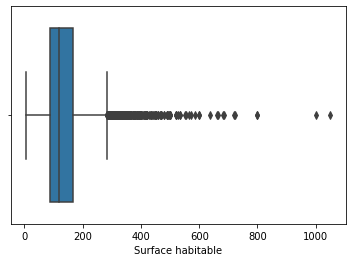

In [39]:
sns.boxplot(x=df['Surface habitable'])

(11536, 16)

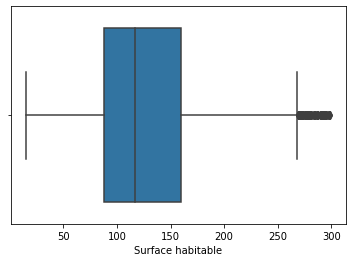

In [40]:
df = df[(df['Surface habitable'] < 300) & (df['Surface habitable'] > 10)]
sns.boxplot(x=df['Surface habitable'])
df.shape

### Surface totale du terrain

In [41]:
print(df['Surface totale du terrain'].value_counts())
# 7000 None.... inexpoitable
df.drop(columns=['Surface totale du terrain'],inplace=True)

None      6851
400.0       29
200.0       28
180.0       27
90.0        25
          ... 
1292.0       1
1101.0       1
5897.0       1
5800.0       1
1089         1
Name: Surface totale du terrain, Length: 1836, dtype: int64


### Surface de la zone constructible

In [42]:
print(df['Surface de la zone constructible'].value_counts())
# 10 000 None.... inexpoitable
df.drop(columns=['Surface de la zone constructible'],inplace=True)

None     10389
100.0       43
70.0        42
90.0        37
80.0        32
         ...  
302.0        1
134.0        1
308.0        1
930.0        1
218.0        1
Name: Surface de la zone constructible, Length: 238, dtype: int64


### Jardin

In [43]:
# Cette collonne semble clean
df['Jardin'].value_counts()

False    7971
True     3565
Name: Jardin, dtype: int64

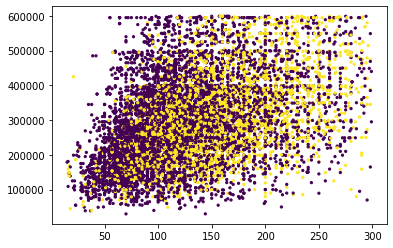

In [44]:
# plt.figure(figsize=(12,7))
plt.scatter(df['Surface habitable'],df['Prix'], c=df['Jardin'], s=5)

### Surface du jardin

In [45]:
df['Surface du jardin'].value_counts()

None      9420
100.0       75
200.0       56
50.0        49
1.0         40
          ... 
829.0        1
4300.0       1
890.0        1
333.0        1
1215.0       1
Name: Surface du jardin, Length: 541, dtype: int64

In [46]:
# 9k None .... drop it fast !
df.drop(columns=['Surface du jardin'],inplace=True)

### Terrasse

In [47]:
# Seem's ok
df['Terrasse'].value_counts()

True     7467
False    4069
Name: Terrasse, dtype: int64

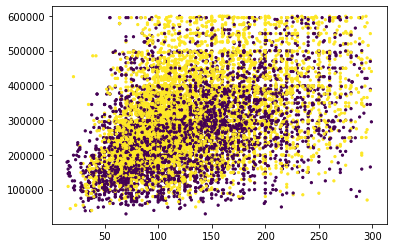

In [48]:
plt.scatter(df['Surface habitable'],df['Prix'], c=df['Terrasse'], s=5)

### Immeuble de rapport

In [49]:
print(df['Immeuble de rapport'].value_counts())
# Les immeubles de rapport ne nous intéressent pas on va donc retirer ces lignes de notre dataset
print(df.shape)
df = df[df['Immeuble de rapport'] == False]
print(df.shape)
# Et enfin supprimer la collone
df.drop(columns=['Immeuble de rapport'],inplace=True)



False    11227
True       309
Name: Immeuble de rapport, dtype: int64
(11536, 13)
(11227, 13)


### Type de cuisine

In [50]:
print(df['Type de cuisine'].value_counts())
# a lot of missing value, i prefer to drop the column
df.drop(columns=['Type de cuisine'],inplace=True)

Équipée                     4121
None                        3035
Hyper équipée               1694
Semi-équipée                 915
Américaine hyper-équipée     692
Pas équipée                  490
Américaine équipée           226
Américaine semi-équipée       51
Américaine non-équipée         3
Name: Type de cuisine, dtype: int64


### Feu ouvert

In [51]:
# Trop peu de TRUE pour être utile
print(df['Feu ouvert'].value_counts())
# Suppression de la collonne
df.drop(columns=['Feu ouvert'],inplace=True)

False    10858
True       369
Name: Feu ouvert, dtype: int64


### Meublé

In [52]:
# Même chose...
print(df['Meublé'].value_counts())
df.drop(columns=['Meublé'],inplace=True)

False    10888
True       339
Name: Meublé, dtype: int64


### Piscine

In [53]:
print(df['Piscine'].value_counts())
# useless...
df.drop(columns=['Piscine'],inplace=True)

False    11113
True       114
Name: Piscine, dtype: int64


## Heatmap

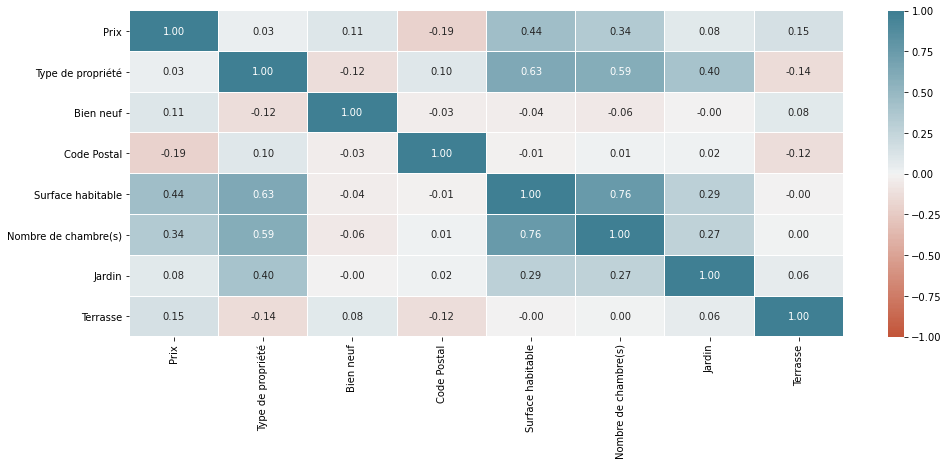

In [54]:
# Print the heatmap
plt.subplots(figsize=(16, 6))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

In [55]:
df.dtypes

Prix                    int64
Type de propriété       int64
Bien neuf                bool
Code Postal             int64
Surface habitable       int64
Nombre de chambre(s)    int64
Jardin                   bool
Terrasse                 bool
dtype: object

In [56]:
df.shape

(11227, 8)

## Rename Columns

In [57]:
# translate and normalise columns name
new_col = {'Prix': 'price',
           'Type de propriété': 'type_of_property',
           'Bien neuf' : 'is_new',
           'Code Postal' : 'postal_code',
           'Surface habitable' : 'house_area',
           'Nombre de chambre(s)' : 'number_of_bedroom',
           'Jardin' : 'garden',
           'Terrasse' : 'terrace'}

In [58]:
df = df.rename(columns = new_col, inplace = False)

## Export

In [59]:
df.to_csv('./dataset/immoCollect18-clean.csv')

## Un peu de visualisation 

In [60]:
house = df[df['type_of_property'] == 1]
apartment = df[df['type_of_property'] == 0]

In [61]:
print(house['price'].mean())
print(apartment['price'].mean())

296592.8222453222
288384.34003428393


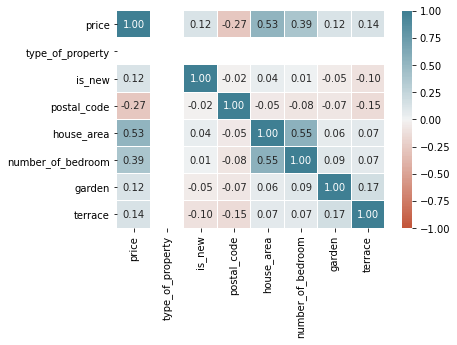

In [62]:
# Print the heatmap from HOUSE
# plt.subplots(figsize=(20, 12))   
sns.heatmap(house.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

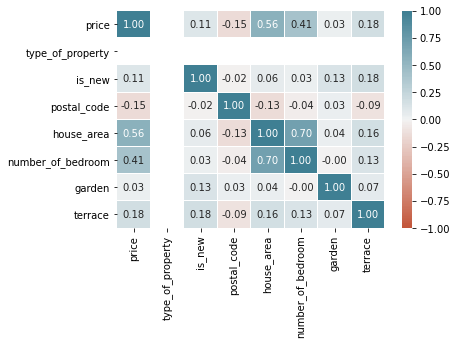

In [63]:
# Print the heatmap from APARTMENT
# plt.subplots(figsize=(20, 12))   
sns.heatmap(apartment.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


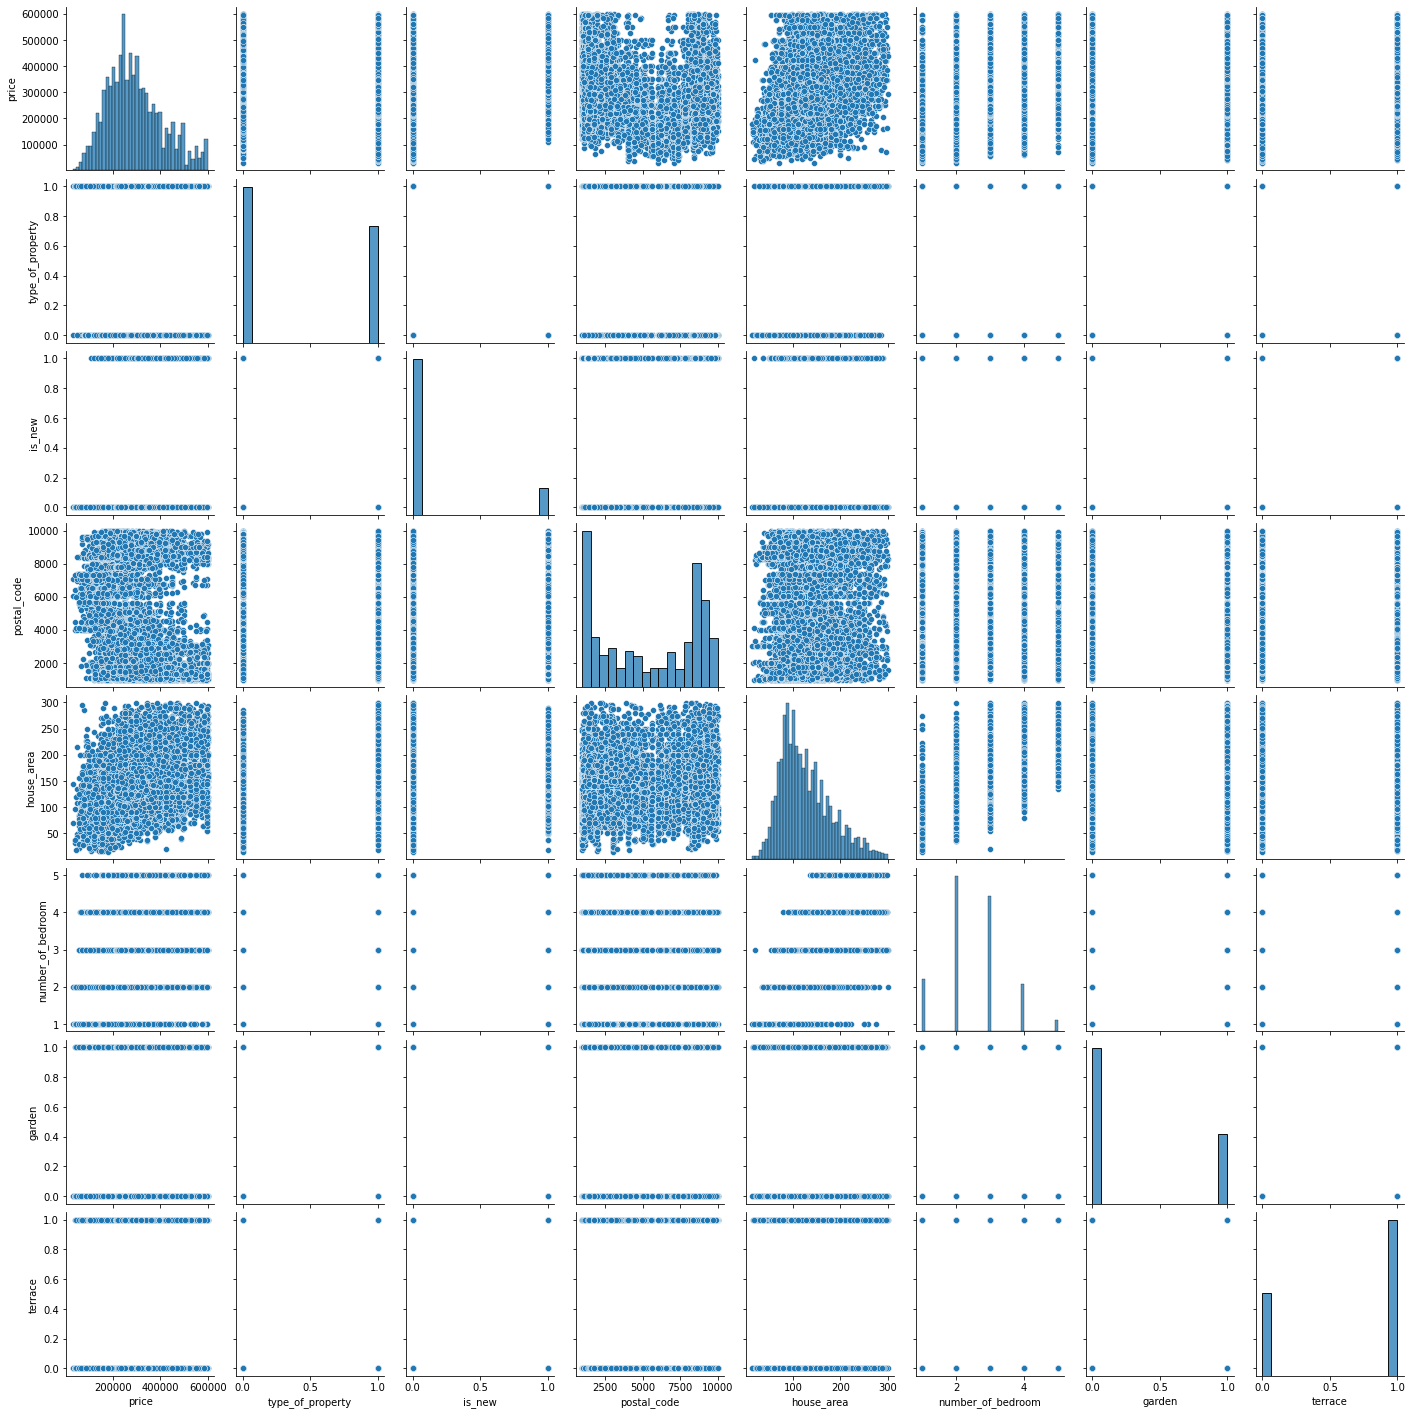

In [64]:
sns.pairplot(df)